In [54]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('movies-regression-dataset.csv')
cred = pd.read_csv('movies-credit-students-train.csv')

df = df.merge(cred, on='title')

In [56]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,viewercount,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_count,vote_average,movie_id,cast,crew
0,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.maoslastdancermovie.com/,33870,"[{""id"": 4328, ""name"": ""costume""}, {""id"": 4528,...",en,Mao's Last Dancer,"At the age of 11, Li was plucked from a poor C...",1.876811,"[{""name"": ""Great Scott Productions Pty. Ltd."",...",...,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,最后的舞者,Mao's Last Dancer,28,6.8,33870,"[{""cast_id"": 2, ""character"": ""Li Cunxin - adul...","[{""credit_id"": ""52fe45419251416c9102c18d"", ""de..."
1,38000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,193,"[{""id"": 10988, ""name"": ""based on tv series""}, ...",en,Star Trek: Generations,Captain Jean-Luc Picard and the crew of the En...,14.779041,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",...,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Boldly go.,Star Trek: Generations,452,6.4,193,"[{""cast_id"": 5, ""character"": ""Captain Jean-Luc...","[{""credit_id"": ""52fe4225c3a36847f8007717"", ""de..."
2,20000000,"[{""id"": 36, ""name"": ""History""}, {""id"": 18, ""na...",http://focusfeatures.com/film/milk/,10139,"[{""id"": 237, ""name"": ""gay""}, {""id"": 582, ""name...",en,Milk,The story of California's first openly gay ele...,30.909699,"[{""name"": ""Focus Features"", ""id"": 10146}]",...,128.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never Blend In.,Milk,612,7.1,10139,"[{""cast_id"": 2, ""character"": ""Harvey Milk"", ""c...","[{""credit_id"": ""52fe43339251416c7500756b"", ""de..."
3,23000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,11632,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,Vanity Fair,"Beautiful, funny, passionate, and calculating,...",6.618149,"[{""name"": ""Alliance Films"", ""id"": 2514}, {""nam...",...,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"On September 1st, a heroine will rise.",Vanity Fair,73,5.5,11632,"[{""cast_id"": 22, ""character"": ""Becky Sharp"", ""...","[{""credit_id"": ""52fe446c9251416c75034365"", ""de..."
4,52000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.frompariswithlovefilm.com/,26389,"[{""id"": 90, ""name"": ""paris""}, {""id"": 591, ""nam...",en,From Paris with Love,James Reese has a good job as an ambassador's ...,27.916284,"[{""name"": ""Apipoula\u00ef"", ""id"": 1076}, {""nam...",...,92.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,Two agents. One city. No merci.,From Paris with Love,675,6.1,26389,"[{""cast_id"": 3, ""character"": ""Charlie Wax"", ""c...","[{""credit_id"": ""5763f7b792514134cd00026b"", ""de..."


In [57]:
df.shape

(3037, 23)

In [58]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
print("train_data " , train_data.shape)
print("test_data " , test_data.shape)

train_data  (2429, 23)
test_data  (608, 23)


In [59]:
# Extract TLD from homepage
from urllib.parse import urlparse

def extract_tld(col):
    lst = []
    for url in col:
        if url is None:
            lst.append(None)
        elif isinstance(url, float):
            lst.append(None)
        else:
            domain = urlparse(url).netloc
            tld = domain.split('.')[-1]
            lst.append(tld)
    return lst

In [60]:
train_data['tld'] = extract_tld(train_data['homepage'])

In [61]:
train_data['tld'].value_counts()

com         827
net          27
uk           11
de           10
movie         8
org           4
au            3
fr            3
ru            2
cn            2
ca            2
jp            1
it            1
dk            1
ch http:      1
hk            1
za            1
ie            1
Name: tld, dtype: int64

In [62]:
train_data['tld'].isnull().sum()

1523

In [63]:
train_data['tld'] = train_data['tld'].fillna('com')

In [64]:
train_data = train_data.drop(columns = ['homepage'], axis = 1)

In [65]:
# check if there are any null values
print(train_data.isnull().sum())

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  1
viewercount               0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   1
spoken_languages          0
status                    0
tagline                 314
title                     0
vote_count                0
vote_average              0
movie_id                  0
cast                      0
crew                      0
tld                       0
dtype: int64


In [66]:
train_data['tagline'] = train_data['tagline'].fillna('Unknown')
train_data = train_data.dropna()
print(train_data.isnull().sum())

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
viewercount             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_count              0
vote_average            0
movie_id                0
cast                    0
crew                    0
tld                     0
dtype: int64


In [67]:
#check if there are any duplicated rows
DRows = train_data[train_data.duplicated()]
print(DRows)

Empty DataFrame
Columns: [budget, genres, id, keywords, original_language, original_title, overview, viewercount, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_count, vote_average, movie_id, cast, crew, tld]
Index: []

[0 rows x 23 columns]


In [68]:
def drop_outliers(data, thresh):
    
   numeric_features = data.drop(columns = ['id', 'original_language','original_title', 'overview' ,
                                     'status', 'tagline' ,'title', 'tld' , 'spoken_languages', 'genres',
                                      'production_companies', 'production_countries', 'keywords', 'release_date',
                                      'cast', 'crew', 'movie_id'], axis = 1)
   new_df = data.copy()
   for col in numeric_features.columns:
       z_scores = (new_df[col] - new_df[col].mean()) / new_df[col].std()
       outliers = new_df[abs(z_scores) > thresh]
       new_df.drop(outliers.index, inplace=True)

  return new_df

In [69]:
train_data = drop_outliers(train_data, 3)

train_data.shape

(2175, 23)

In [70]:
#Extract features from Dictionary
import json
def extract_name(col, df, new_col):
    df[col] = df[col].apply(lambda x: json.loads(x) if x is not None else [])
    df[new_col] = df[col].apply(lambda x: [dict_['name'] for dict_ in x] if x else [])
    df[new_col] = df[new_col].apply(lambda x: ', '.join(x) if x else '')
    df.drop(col, axis=1, inplace=True)

In [71]:
extract_name('spoken_languages', train_data, 'Lang')
extract_name('genres', train_data, 'genre_names')
extract_name('production_companies', train_data, 'production_company')
extract_name('production_countries', train_data, 'production_country')
extract_name('keywords', train_data, 'keyword')

In [72]:
train_data['genre_names']

227                       Drama, Foreign, Romance
365     Action, Horror, Science Fiction, Thriller
2501                               Romance, Drama
2001                       Crime, Drama, Thriller
1811                              Comedy, Romance
                          ...                    
466                           Drama, History, War
2169                                      Romance
1638                                        Drama
1130                       Comedy, Drama, Romance
860                               Comedy, Romance
Name: genre_names, Length: 2175, dtype: object

In [73]:
# Extract Director from Crew 
def extract_features(data, crew):
    data['Director'] = data[crew].apply(json.loads)
    data['Director'] = data['Director'].apply(lambda x: [d['name'] for d in x if d['job'] == 'Director'])
    data['Director'] = data['Director'].apply(lambda x: x[0] if len(x) > 0 else '')
    data.drop(columns=[crew], axis=1, inplace=True)

In [74]:
extract_features(train_data, 'crew')

In [75]:
train_data['Director']

227            Vic Sarin
365       John Carpenter
2501         Nora Ephron
2001    William Friedkin
1811      Bille Woodruff
              ...       
466          Zhang Yimou
2169      Randal Kleiser
1638         Mike Figgis
1130       Gary Hardwick
860            Paul Feig
Name: Director, Length: 2175, dtype: object

In [76]:
def main_actores(data, cast):
  data['cast_names'] = data[cast].apply(json.loads)
  data['cast_names'] = data['cast_names'].apply(lambda x: [item['name'] for item in x[:3]] if len(x) > 0 else [])
  data.drop(columns = [cast], axis = 1 , inplace = True)

main_actores(train_data, 'cast')
train_data['cast_names']

227           [Kristin Kreuk, Jimi Mistry, Neve Campbell]
365                [Roddy Piper, Keith David, Meg Foster]
2501             [Meryl Streep, Amy Adams, Stanley Tucci]
2001    [Matthew McConaughey, Emile Hirsch, Thomas Had...
1811    [Queen Latifah, Alicia Silverstone, Andie MacD...
                              ...                        
466                   [Christian Bale, Ni Ni, Tong Dawei]
2169    [John Travolta, Olivia Newton-John, Stockard C...
1638     [Julian Sands, Saffron Burrows, Justin Chadwick]
1130       [Morris Chestnut, D. L. Hughley, Bill Bellamy]
860              [Kristen Wiig, Rose Byrne, Maya Rudolph]
Name: cast_names, Length: 2175, dtype: object

In [77]:
# Extract the Release year from Release date 
from datetime import datetime
def Extract_year(data):
  data['release_date'] = pd.to_datetime(data['release_date'], dayfirst=True)
  data['release_year'] = data['release_date'].dt.year
  data.drop(columns = ['release_date'], axis = 1, inplace = True)

Extract_year(train_data)

train_data.head()

,budget,id,original_language,original_title,overview,viewercount,revenue,runtime,status,tagline,...,movie_id,tld,Lang,genre_names,production_company,production_country,keyword,Director,cast_names,release_year
227,0,14608,en,Partition,"Determined to leave the ravages of war behind,...",2.131524,0,116.0,Released,Unknown,...,14608,com,English,"Drama, Foreign, Romance","Partition Films%2C Inc., Khussro Films","Canada, South Africa, United Kingdom","drama, independent film",Vic Sarin,"[Kristin Kreuk, Jimi Mistry, Neve Campbell]",2007
365,4000000,8337,en,They Live,"Nada, a down-on-his-luck construction worker, ...",29.852608,13008928,94.0,Released,Who are they? And what do they want?,...,8337,com,English,"Action, Horror, Science Fiction, Thriller","Universal Pictures, Alive Films, Larry Franco ...",United States of America,"dystopia, social commentary, alien invasion, s...",John Carpenter,"[Roddy Piper, Keith David, Meg Foster]",1988
2501,40000000,24803,en,Julie & Julia,Julia Child and Julie Powell – both of whom wr...,22.853006,129540499,123.0,Released,Based on Two True Stories,...,24803,com,"English, Français","Romance, Drama","Columbia Pictures, Scott Rudin Productions, Ea...",United States of America,"cooking, book, cookbook, blog, recipe, woman d...",Nora Ephron,"[Meryl Streep, Amy Adams, Stanley Tucci]",2009
2001,10000000,73567,en,Killer Joe,A cop (Matthew McConaughey) who moonlights as ...,16.436178,3665069,102.0,Released,A Totally Deep-Fried Texas Redneck Trailer Par...,...,73567,com,English,"Crime, Drama, Thriller","Voltage pictures, Worldview Entertainment, ANA...",United States of America,"trailer park, gun, texas, deal, psychopath, se...",William Friedkin,"[Matthew McConaughey, Emile Hirsch, Thomas Had...",2011
1811,25000000,14177,en,Beauty Shop,You thought you'd heard it all in the barbersh...,5.625632,36351350,105.0,Released,A Cut Above,...,14177,com,English,"Comedy, Romance",Metro-Goldwyn-Mayer (MGM),United States of America,,Bille Woodruff,"[Queen Latifah, Alicia Silverstone, Andie MacD...",2005


In [78]:
def get_list(data, col):
  copied_df = data.copy()
  copied_df[col] = copied_df[col].str.split(",")
  copied_df = copied_df.explode(col)
  lst = set(copied_df[col].str.strip().unique().tolist())
  lst.discard('')
  return lst

In [79]:
lang_list = get_list(train_data, 'Lang')
print(len(lang_list))
print(lang_list)

53
{'Dansk', 'Português', 'עִבְרִית', 'Bosanski', 'Pусский', 'Hrvatski', 'Cymraeg', 'Español', 'shqip', 'български език', 'Gaeilge', 'svenska', 'اردو', 'Polski', 'Український', 'Íslenska', 'Tiếng Việt', 'Magyar', 'తెలుగు', '广州话 / 廣州話', 'Galego', 'Český', 'Slovenčina', 'ਪੰਜਾਬੀ', 'suomi', '普通话', 'isiZulu', 'English', 'Italiano', 'বাংলা', 'Afrikaans', 'Latin', 'فارسی', 'ελληνικά', 'हिन्दी', 'தமிழ்', 'Srpski', 'Norsk', 'Română', '한국어/조선말', 'Somali', 'Esperanto', 'ภาษาไทย', 'Deutsch', 'Türkçe', 'қазақ', 'العربية', 'No Language', 'Nederlands', 'Kiswahili', 'Français', '日本語', 'ქართული'}


In [80]:
genre_list = get_list(train_data, 'genre_names')
print(genre_list)
len(genre_list)

{'Western', 'Thriller', 'History', 'Documentary', 'Mystery', 'TV Movie', 'Romance', 'Foreign', 'Drama', 'Animation', 'Action', 'War', 'Horror', 'Adventure', 'Music', 'Crime', 'Family', 'Science Fiction', 'Comedy', 'Fantasy'}


20

In [81]:
country_list = get_list(train_data,'production_country')
print(country_list)
len(country_list)


{'Japan', 'Ukraine', 'Austria', 'United Kingdom', 'India', 'South Africa', 'Mexico', 'Thailand', 'Malaysia', 'Taiwan', 'Poland', 'Cambodia', 'Norway', 'Australia', 'Bolivia', 'Tunisia', 'South Korea', 'Russia', 'Switzerland', 'Fiji', 'Philippines', 'United States of America', 'Finland', 'Canada', 'Denmark', 'Romania', 'Netherlands', 'Bulgaria', 'Belgium', 'Italy', 'Argentina', 'Serbia', 'Portugal', 'Hong Kong', 'Germany', 'Pakistan', 'Kazakhstan', 'Morocco', 'Ireland', 'New Zealand', 'Bosnia and Herzegovina', 'Iceland', 'Slovakia', 'Panama', 'Aruba', 'United Arab Emirates', 'Spain', 'Hungary', 'Brazil', 'China', 'Czech Republic', 'Luxembourg', 'Israel', 'France', 'Sweden'}


55

In [82]:
company_list = get_list(train_data, 'production_company')
len(company_list)

2755

In [83]:
keyword_list = get_list(train_data, 'keyword')
len(keyword_list)

6345

In [84]:
# One Hot Encoding 
def one_hot_encoding(data, lst, col):
  for item in lst:
    data[item] = data[col].apply(lambda x: 1 if item in x else 0)
  data.drop(columns = [col], axis = 1, inplace = True)

In [85]:
one_hot_encoding(train_data, genre_list, 'genre_names')
train_data.shape

(2175, 42)

In [86]:

one_hot_encoding(train_data, country_list, 'production_country')
train_data.shape

(2175, 96)

In [87]:

one_hot_encoding(train_data, lang_list, 'Lang')
train_data.shape

(2175, 148)

In [88]:
tld_list = train_data['tld'].unique()
one_hot_encoding(train_data, tld_list, 'tld')
train_data.shape

(2175, 165)

In [89]:
# splits each string into a list of words using whitespace as the delimiter
train_data['overview'] = train_data['overview'].apply(lambda x:x.split())
train_data['tagline'] = train_data['tagline'].apply(lambda x:x.split())

In [90]:
def Remove_spaces(col):
    lst = []
    for item in col:
        item = item.replace(" ","")
        lst.append(item)
    return lst

In [91]:
train_data['cast_names'] = train_data['cast_names'].apply(Remove_spaces)
train_data['Director'] = train_data['Director'].apply(Remove_spaces)
train_data['production_company']  =  train_data['production_company'].apply(Remove_spaces)
train_data['keyword'] = train_data['keyword'].apply(Remove_spaces)

In [92]:
train_data['tags'] = train_data['tagline'] + train_data['overview'] + train_data['production_company'] + train_data['keyword'] + train_data['Director'] + train_data['cast_names']
train_data = train_data.drop(columns = ['tagline', 'overview','production_company','keyword','Director','cast_names'])
train_data['tags'] = train_data['tags'].apply(lambda x: " ".join(x))

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer(max_features=5000,stop_words='english')

vec = cv.fit_transform(train_data['tags']).toarray()
similarity = cosine_similarity(vec)

average_similarity = np.mean(similarity, axis=1)

print(average_similarity)

[0.04854731 0.01586484 0.0175811  ... 0.03609157 0.02300839 0.02687038]


In [94]:
train_data = train_data.drop(columns = ['tags'], axis = 1)
combined_features = np.column_stack((train_data, average_similarity))

In [95]:
train_data.shape

(2175, 159)

In [96]:
combined_features.shape

(2175, 160)

In [97]:
col_names = train_data.columns.tolist()
col_names.append('tags')
train_data = pd.DataFrame(combined_features, columns = col_names)

train_data.head()

,budget,id,original_language,original_title,viewercount,revenue,runtime,status,title,vote_count,...,movie,dk,ch http:,ru,hk,za,cn,ca,ie,tags
0,0,14608,en,Partition,2.131524,0,116.0,Released,Partition,6,...,0,0,0,0,0,0,0,0,0,0.048547
1,4000000,8337,en,They Live,29.852608,13008928,94.0,Released,They Live,550,...,0,0,0,0,0,0,0,0,0,0.015865
2,40000000,24803,en,Julie & Julia,22.853006,129540499,123.0,Released,Julie & Julia,560,...,0,0,0,0,0,0,0,0,0,0.017581
3,10000000,73567,en,Killer Joe,16.436178,3665069,102.0,Released,Killer Joe,425,...,0,0,0,0,0,0,0,0,0,0.029838
4,25000000,14177,en,Beauty Shop,5.625632,36351350,105.0,Released,Beauty Shop,115,...,0,0,0,0,0,0,0,0,0,0.004724


In [98]:
train_data['original_language'].value_counts()

en    2060
fr      37
zh      17
es      10
de       9
ru       7
hi       6
cn       6
ko       5
ja       3
it       3
pt       2
th       2
da       2
sv       1
ta       1
cs       1
hu       1
te       1
nl       1
Name: original_language, dtype: int64

In [99]:
en_count = train_data['original_language'].value_counts()[0]
en_count

2060

([<matplotlib.patches.Wedge at 0x25cbdbb3d90>,
 [Text(-0.18187879056837192, -1.0848594865425598, 'English'),
  Text(0.1818787524789185, 1.0848594929283297, 'other Languages')],
 [Text(-0.09920661303729376, -0.5917415381141234, '94.7%'),
  Text(0.09920659226122826, 0.5917415415972707, '5.3%')])

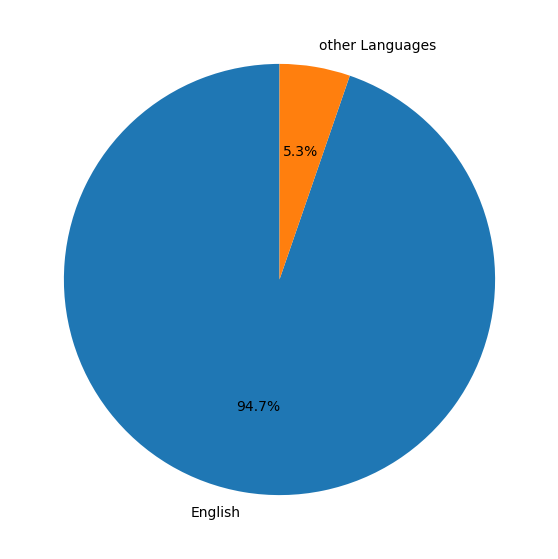

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = np.array(['English','other Languages'])
perc = np.array([en_count, sum(train_data['original_language'].value_counts()) - en_count])

plt.figure(figsize=(7,7))
plt.pie(perc, labels=labels, autopct='%1.1f%%', startangle=90)

In [101]:
train_data['original_language'] = train_data['original_language'].apply(lambda x: 1 if 'en' == x else 0)

train_data['original_language'].value_counts()

1    2060
0     115
Name: original_language, dtype: int64

In [102]:
train_data['status'].unique()


array(['Released', 'Post Production'], dtype=object)

In [103]:
train_data['status'] = train_data['status'].apply(lambda x: 1 if 'Released' == x else 0)

train_data = train_data.drop(columns = ['id', 'original_title', 'title' , 'movie_id'], axis = 1)

x_train = train_data.drop(columns = ['vote_average'], axis = 1)
y_train = train_data['vote_average']

In [104]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
feature_selector = SelectKBest(score_func=f_classif, k= 20)
fit = feature_selector.fit(x_train, y_train)
features = fit.transform(x_train)
features[0,:]

array([0, 1, 2.131524, 0, 116.0, 1, 6, 2007, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [105]:
names = x_train.columns[feature_selector.get_support()]
names

Index(['budget', 'original_language', 'viewercount', 'revenue', 'runtime',
       'status', 'vote_count', 'release_year', 'Documentary', 'Drama',
       'Action', 'Horror', 'Science Fiction', 'Comedy', 'India', 'Poland',
       'South Korea', 'Switzerland', 'United States of America', 'Hong Kong',
       'Ireland', 'Luxembourg', 'తెలుగు', 'ਪੰਜਾਬੀ', 'தமிழ்', 'Norsk', 'Somali',
       'қазақ', 'No Language', 'it'],
      dtype='object')

In [106]:
x_train = train_data[names]
y_train = train_data['vote_average']

In [107]:
x_train.head()

,budget,original_language,viewercount,revenue,runtime,status,vote_count,release_year,Documentary,Drama,...,Ireland,Luxembourg,తెలుగు,ਪੰਜਾਬੀ,தமிழ்,Norsk,Somali,қазақ,No Language,it
0,0,1,2.131524,0,116.0,1,6,2007,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4000000,1,29.852608,13008928,94.0,1,550,1988,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40000000,1,22.853006,129540499,123.0,1,560,2009,0,1,...,0,0,0,0,0,0,0,0,0,0
3,10000000,1,16.436178,3665069,102.0,1,425,2011,0,1,...,0,0,0,0,0,0,0,0,0,0
4,25000000,1,5.625632,36351350,105.0,1,115,2005,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
def proprocessing(dataset):
 
  
  dataset = dataset.drop_duplicates()
  dataset = drop_outliers(dataset, 3)
  extract_name('spoken_languages', dataset, 'Lang')
  extract_name('genres', dataset, 'genre_names')
  extract_name('production_companies', dataset, 'production_company')
  extract_name('production_countries', dataset, 'production_country')
  extract_name('keywords', dataset, 'keyword')
  extract_features(dataset, 'crew')
  main_actores(dataset, 'cast')
  Extract_year(dataset)
  one_hot_encoding(dataset, genre_list, 'genre_names')
  one_hot_encoding(dataset, country_list, 'production_country')
  one_hot_encoding(dataset, lang_list, 'Lang')
  one_hot_encoding(dataset, tld_list, 'tld')
  return dataset

In [109]:
def processing2(dataset):
  dataset['overview'] = dataset['overview'].apply(lambda x:x.split())
  dataset['tagline'] = dataset['tagline'].apply(lambda x:x.split())

  dataset['cast_names'] = dataset['cast_names'].apply(Remove_spaces)
  dataset['Director'] = dataset['Director'].apply(Remove_spaces)
  dataset['production_company']  =  dataset['production_company'].apply(Remove_spaces)
  dataset['keyword'] = dataset['keyword'].apply(Remove_spaces)

  dataset['tags'] = dataset['tagline'] + dataset['overview'] + dataset['production_company'] + dataset['keyword'] + dataset['Director'] + dataset['cast_names']
  dataset = dataset.drop(columns = ['tagline', 'overview','production_company','keyword','Director','cast_names'])
  dataset['tags'] = dataset['tags'].apply(lambda x: " ".join(x))

  vec_test = cv.transform(dataset['tags']).toarray()
  similarity_test = cosine_similarity(vec_test)
  similarity_mean = np.mean(similarity_test, axis = 1)
  similarity_mean_column = similarity_mean.reshape(-1, 1)

  dataset = dataset.drop(columns = ['tags'], axis = 1)
  combined_features2 = np.column_stack((dataset, similarity_mean_column))

  col_names2 = dataset.columns.tolist()
  col_names2.append('tags')
  dataset = pd.DataFrame(combined_features2, columns = col_names2)

  dataset['original_language'] = dataset['original_language'].apply(lambda x: 1 if 'en' == x else 0)
  dataset['status'] = dataset['status'].apply(lambda x: 1 if 'Released' == x else 0)
  dataset = dataset.drop(columns = ['id', 'original_title', 'title' , 'movie_id'], axis = 1)
  return dataset

In [110]:
### Transforming Test Data
# Missing Values
test_data['tld'] = extract_tld(test_data['homepage'])
test_data = test_data.drop(columns = ['homepage'], axis = 1)

In [111]:
test_data['tld'] = test_data['tld'].fillna('com')
test_data['tagline'] = test_data['tagline'].fillna('Unknown')
test_data = test_data.dropna()
test_data.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
viewercount             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_count              0
vote_average            0
movie_id                0
cast                    0
crew                    0
tld                     0
dtype: int64

In [112]:
test_data = proprocessing(test_data)
test_data = processing2(test_data)

In [113]:
test_data.head()

,budget,original_language,viewercount,revenue,runtime,status,vote_count,vote_average,release_year,Western,...,movie,dk,ch http:,ru,hk,za,cn,ca,ie,tags
0,0,1,10.706613,19406406,84.0,1,111,7.3,2009,0,...,0,0,0,0,0,0,0,0,0,0.024196
1,28000000,1,57.518472,133346506,130.0,1,2607,7.3,2015,0,...,0,0,0,0,0,0,0,0,0,0.023568
2,30000000,1,15.89534,31070211,87.0,1,458,4.8,2006,0,...,0,0,0,0,0,0,0,0,0,0.029105
3,35000000,1,9.525037,60251371,123.0,1,103,6.8,2010,0,...,0,0,0,0,0,0,0,0,0,0.02494
4,50000000,1,9.622345,0,137.0,1,88,6.3,1999,0,...,0,0,0,0,0,0,0,0,0,0.022752


In [115]:
train_columns = train_data.columns.tolist()

for column in train_columns:
    if column not in test_data.columns:
        test_data[column] = 0

In [116]:
x_test = test_data[names]
y_test = test_data['vote_average']

In [117]:
x_test.head()

,budget,original_language,viewercount,revenue,runtime,status,vote_count,release_year,Documentary,Drama,...,Ireland,Luxembourg,తెలుగు,ਪੰਜਾਬੀ,தமிழ்,Norsk,Somali,қазақ,No Language,it
0,0,1,10.706613,19406406,84.0,1,111,2009,1,0,...,0,0,0,0,0,0,0,0,0,0
1,28000000,1,57.518472,133346506,130.0,1,2607,2015,0,1,...,0,0,0,0,0,0,0,0,0,0
2,30000000,1,15.89534,31070211,87.0,1,458,2006,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35000000,1,9.525037,60251371,123.0,1,103,2010,0,1,...,0,0,0,0,0,0,0,0,0,0
4,50000000,1,9.622345,0,137.0,1,88,1999,0,1,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# Data Scaling - Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

x_train_scaled[0]

array([-0.96783544,  0.23627366, -1.08170048, -0.75629785,  0.48898601,
        0.02144718, -0.8689941 ,  0.40592546, -0.07754322,  1.02750455,
       -0.57186421, -0.33799675, -0.33375888, -0.80403976, -0.09633661,
       -0.03033787, -0.06446026, -0.05682237, -2.3945242 , -0.10999387,
       -0.10108561, -0.05682237, -0.02144718, -0.02144718, -0.03033787,
       -0.04800154, -0.02144718, -0.02144718, -0.02144718, -0.02144718])

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model1 = LinearRegression()
model1.fit(x_train_scaled, y_train)
Y_pred1 = model1.predict(x_test_scaled) 
mse = mean_squared_error(y_test, Y_pred1)
print(mse)

0.3716837393046636


In [120]:
from sklearn.metrics import r2_score
print(r2_score(y_test, Y_pred1))

0.4657156668728605


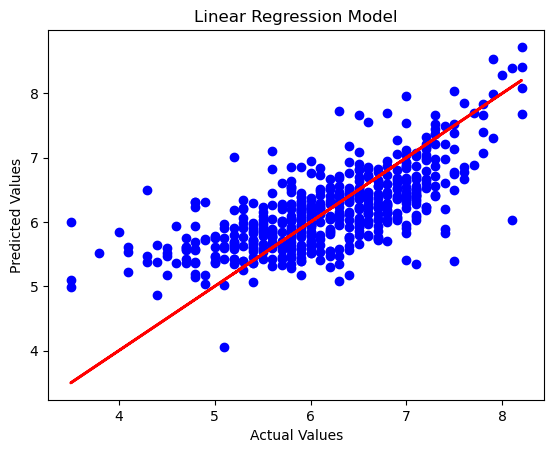

In [121]:
# Plotting the Linear Regression
plt.scatter(y_test, Y_pred1, color='blue')

plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')

plt.show()

In [122]:
from sklearn.svm import SVR
model2 = SVR(kernel='linear', C= 0.5)
model2.fit(x_train_scaled, y_train)
Y_pred2 = model2.predict(x_test_scaled) 
mse2 = mean_squared_error(y_test, Y_pred2)
print(mse2)

0.3757061488398111


In [123]:
print(r2_score(y_test, Y_pred2))

0.4599335726653736


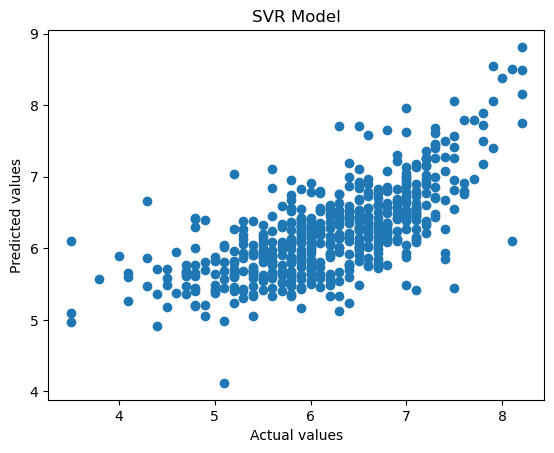

In [124]:
# Plotting SVR
plt.scatter(y_test, Y_pred2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SVR Model")
plt.show()

In [125]:
import pickle
with open('LinearReg.pkl', 'wb') as f:
    pickle.dump(model1, f)
with open('SVR.pkl', 'wb') as f:
    pickle.dump(model2, f)

In [138]:
###loading the models
def loading_models(file_name, new_X):
    
    with open(file_name, 'rb') as f:
        clf = pickle.load(f)
        predictions = clf.predict(new_X)
        return predictions

In [127]:
# test_script 
test_cred = pd.read_csv('tmdb_5000_credits.csv')
test_script = pd.read_csv('tmdb_5000_movies.csv')
test_script = test_script.merge(test_cred, on='title')

In [128]:
test_script['tld'] = extract_tld(test_script['homepage'])

In [129]:
test_script = test_script.drop(columns = ['homepage'], axis = 1)

In [130]:
def replace_nulls(data):
    for col in data.columns:
        mode = data[col].mode()
        if len(mode) > 0 and not pd.isnull(mode[0]):
            data[col].fillna(mode[0], inplace=True)
        else:
            second_mode = data[col].value_counts().index[1] if len(data[col].value_counts()) > 1 else None
            if second_mode is not None:
                data[col].fillna(second_mode, inplace=True)
            else:
                data[col].fillna(0, inplace=True)
    return data

In [131]:
test_script_transformed = replace_nulls(test_script)

In [132]:
test_script_transformed = proprocessing(test_script_transformed)

In [133]:
test_script_transformed = processing2(test_script_transformed)

In [134]:
for column in train_columns:
    if column not in test_script_transformed.columns:
        test_script_transformed[column] = 0

x_test_script = test_script_transformed[names]
y_test_script = test_script_transformed['vote_average']

In [135]:
new_test_script = scaler.transform(x_test_script)

In [139]:
LR_predictions = loading_models('LinearReg.pkl',new_test_script)
LR_predictions

array([5.72021853, 4.73586899, 5.27164907, ..., 5.97903936, 5.60025212,
       6.60139611])

In [137]:
MSE = mean_squared_error(y_test_script, dt_predictions)
print(MSE)

0.5619691664347694
